# Drug Review Dataset

The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29).

The data is divided into two separated tab-separated-values files (.tsv format) consisting of the training and testing data following a 75% - 25% split. Both the test and the train datasets consists of the following attributes:
1. drugName (categorical): Name of the drug.
2. condition (categorical): Name of the medical condition for which the drug is prescribed.
3. review (text): Patient review of the drug.
4. rating (numerical): Rating given to the drug that the patients have used
5. date (date): Date of entry of the review.
6. usefulCount (numerical): Number of users who found review useful.

Additionally, there is an ID column which has been unnamed. 

**Important**: Note that we do not have any *'Target'* column in this dataset. In order to do a classification on this dataset, it is imperative to come with a sensible method based on which we can implement a classification.

**Classification - Idea**: We can split the review into two classes - reviews that are less than 5 are classified as 'Not Recommended' and reviews that have more than or equal to 5 are classified as 'Recommended'.

Check the directory:

In [1]:
import os
os.getcwd()

'D:\\Python\\Dataset Training\\NLP Project - Drug Review'

Import the Training Data:

In [2]:
import pandas as pd

train_data = pd.read_csv(r'./drugsComTrain_raw.tsv', sep='\t')
train_data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


The unnamed column is actually the unique ID of the Review in question. We will drop the column since it does not aid in our analysis. 

Let's look at the Test data:

In [4]:
test_data = pd.read_csv(r'./drugsComTest_raw.tsv', sep='\t')
test_data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   53766 non-null  int64  
 1   drugName     53766 non-null  object 
 2   condition    53471 non-null  object 
 3   review       53766 non-null  object 
 4   rating       53766 non-null  float64
 5   date         53766 non-null  object 
 6   usefulCount  53766 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


We notice that both the test and the train datasets have the same columns and have missing values only in the 'Condition' column. We concatenate the test and train datasets together:

In [6]:
data = pd.concat([train_data, test_data], axis = 0, 
                 ignore_index = True, verify_integrity = True)
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215063 non-null  int64  
 1   drugName     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.5+ MB


## Data Preprocessing

In [8]:
data.rename(columns = {'Unnamed: 0': 'ID'}, inplace = True)

In [9]:
data.describe(include = 'all')

,ID,drugName,condition,review,rating,date,usefulCount
count,215063.000000,215063,213869,215063,215063.000000,215063,215063.000000
unique,NaN,3671,916,128478,NaN,3579,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,"March 1, 2016",NaN
freq,NaN,4930,38436,39,NaN,185,NaN
mean,116039.364814,NaN,NaN,NaN,6.990008,NaN,28.001004
std,67007.913366,NaN,NaN,NaN,3.275554,NaN,36.346069
min,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,58115.500000,NaN,NaN,NaN,5.000000,NaN,6.000000
50%,115867.000000,NaN,NaN,NaN,8.000000,NaN,16.000000
75%,173963.500000,NaN,NaN,NaN,10.000000,NaN,36.000000


We will drop the ID column eventually, so we are not concerned about it. However, one thing stands out: the mean usefulCount is around 28 and its standard deviation is around 36. The high value of standard deviation, together with the maximum value of the usefulCount column, may translate into the presence of outliers.

In [10]:
from pandas_profiling import ProfileReport
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Quick Takeaways:
- The Review column is uniformly distributed and has high cardinality owing to the distinctly unique words that may be present in the review.
- The condition column accounts for the whole of the missing values present in the dataset. However, when considering the whole dataset, the missing values account only about 0.6% which is negligibly small, considering the size of the dataset. Thus, we choose to drop these 1194 rows rather than handle them.
- The minimum rating is 1 and the maximum rating is 10. The mean rating is about 7, which means that there are overall positive reviews.
- In the usefulCount column, we find that 3.9% of the reviews are deemed to be useless. In other words, there are roughly 8400 reviews for which the users stated that it is of no value, whatsoever - it is trash. We also notice that the 1291 people found a particular review of a drug extremely useful. It will be interesting to see what drug and condition this review was about and also read the review itself.

In [11]:
data.dropna(axis = 0, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213869 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           213869 non-null  int64  
 1   drugName     213869 non-null  object 
 2   condition    213869 non-null  object 
 3   review       213869 non-null  object 
 4   rating       213869 non-null  float64
 5   date         213869 non-null  object 
 6   usefulCount  213869 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


Now, we try to understand whether multiple drugs are used to treat a given medical condition:

In [12]:
data.groupby('condition')['drugName'].nunique().sort_values(ascending = False)

condition
Not Listed / Othe                              253
Pain                                           219
Birth Control                                  181
High Blood Pressure                            146
Acne                                           127
                                              ... 
Short Stature                                    1
Short Stature for Age                            1
54</span> users found this comment helpful.      1
Lyme Disease, Erythema Chronicum Migrans         1
Intermittent Explosive Disorde                   1
Name: drugName, Length: 916, dtype: int64

Okay, so as we expected, multiple drugs are indeed used to treat a given medical condition.

However, we also notice two things immediately:
- There exists a condition named 'Not Listed / Othe' which corresponds to the Unlisted or Unknown conditions. We would either have to replace these values with the condition corresponding to the drugs or we have to drop these values.
- There are conditions titled **\</span> users found this comment helpful.** which implies that the dataset was probably collected from the internet webpages using webscrapping techniques. We have to remove these values.

In [13]:
not_listed_other = data[data['condition'] == 'Not Listed / Othe']
print('Number of not listed values:', (not_listed_other.shape)[0])
print('Percentage of not listed values:', 100 * (not_listed_other.shape)[0]/data.shape[0])

Number of not listed values: 592
Percentage of not listed values: 0.27680496004563543


The not listed values only accounts for roughly 0.28% of the total data. We choose to drop these values.

In [14]:
data.drop(not_listed_other.index, axis = 0, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213277 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           213277 non-null  int64  
 1   drugName     213277 non-null  object 
 2   condition    213277 non-null  object 
 3   review       213277 non-null  object 
 4   rating       213277 non-null  float64
 5   date         213277 non-null  object 
 6   usefulCount  213277 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.0+ MB


In [15]:
span_comments = data[data['condition'].str.contains('<\/span> users', regex = True)]
print('Number of <\/span> users values:', (span_comments.shape)[0])
print('Percentage of <\/span> users values:', 100 * (span_comments.shape)[0]/data.shape[0])

Number of <\/span> users values: 1171
Percentage of <\/span> users values: 0.5490512338414363


These sort of "conditions" containing '<\/span>' account for about 0.55% of the total data. Thus, it is safe to ignore this incorrect values:

In [16]:
data.drop(span_comments.index, axis = 0, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212106 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           212106 non-null  int64  
 1   drugName     212106 non-null  object 
 2   condition    212106 non-null  object 
 3   review       212106 non-null  object 
 4   rating       212106 non-null  float64
 5   date         212106 non-null  object 
 6   usefulCount  212106 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 12.9+ MB


We drop the ID column:

In [17]:
data.drop('ID', axis = 1, inplace = True)

We now take only the Month and Year from the date column. We can use Regular expression:

In [18]:
import re
def period_extraction(date):
    extracted_list = re.findall('(?:[a-zA-Z]+|\d{4})', date)
    return ' '.join(extracted_list)

data['Period'] = data['date'].apply(period_extraction)
data['date'] = pd.to_datetime(data['date'])
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data.head()

,drugName,condition,review,rating,date,usefulCount,Period,Year,Month
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,May 2012,2012,5
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,April 2010,2010,4
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,December 2009,2009,12
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,November 2015,2015,11
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37,November 2016,2016,11


We now drop the date column since we have extracted all the required details:

In [19]:
data.drop('date', axis = 1, inplace = True)
data.head()

,drugName,condition,review,rating,usefulCount,Period,Year,Month
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,27,May 2012,2012,5
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,192,April 2010,2010,4
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,17,December 2009,2009,12
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,10,November 2015,2015,11
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,37,November 2016,2016,11


### Text Preprocessing

We now preprocess the review column:
- When we read through the reviews, we noticed that there were a lot of special characters in the reviews that just did not make any sense. We will have to remove them. 
- We noticed that majority of the reviews started and ended with double quotation (" ") marks which is an equivalent of the HTML quotation tag used in web browsers these days. We will remove them.
- We will use Stopwords to take out the words that are not important at all.
- Finally, we use Lemmatization to ensure that our words retain its significance, atleast to some extent.

In [20]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

Stopwords = stopwords.words('english')
Lemmatizer = WordNetLemmatizer()

def text_preprocessing(review):
    html_removed = BeautifulSoup(review, 'html.parser').get_text()
    text_cleaned = re.sub('[^a-zA-Z]', ' ', html_removed)
    stopwords_removed = [word for word in text_cleaned.lower().split() if word not in Stopwords]
    Lemmatized_words = [Lemmatizer.lemmatize(word) for word in stopwords_removed]
    return (' '.join(Lemmatized_words))

In [21]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

In [22]:
data['reviewScrapped'] = data['review'].apply(text_preprocessing)
data.head()

,drugName,condition,review,rating,usefulCount,Period,Year,Month,reviewScrapped
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,27,May 2012,2012,5,side effect take combination bystolic mg fish oil
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,192,April 2010,2010,4,son halfway fourth week intuniv became concern...
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,17,December 2009,2009,12,used take another oral contraceptive pill cycl...
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,10,November 2015,2015,11,first time using form birth control glad went ...
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,37,November 2016,2016,11,suboxone completely turned life around feel he...


We can check the Scrapped review for which the usefulCount was the highest at 1291 (see data described):

In [23]:
print(data.loc[data['usefulCount'] == 1291]['reviewScrapped'].unique())

['remember reading people opinion online drug took scared away finally decided give try best choice made month feel great mg side effect first started notice hand would tremble subsided honestly listen negativity work work amazing others go based youself everyone else may blessing diguise pill meant make happy go lucky see butterfly rose meant help put chemical mind balance overly depressed still get sad time normal life people take control make change getting pill']


Looks pretty neat. 

## Exploratory Data Analysis

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Let's check the top 10 highest rated drugs:

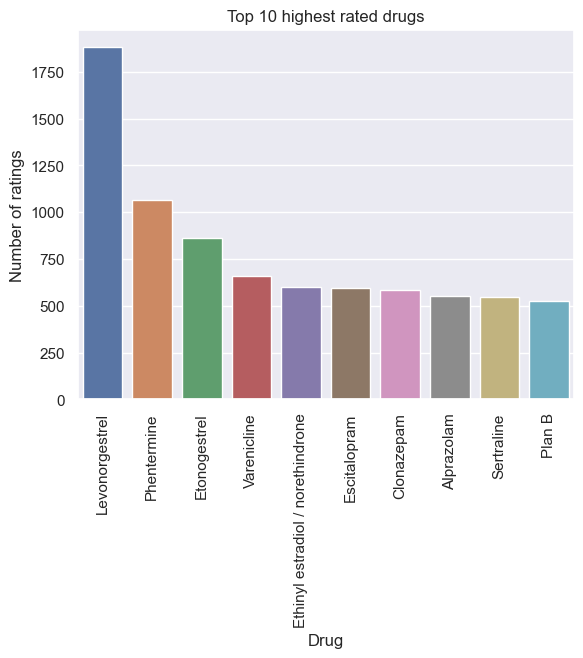

In [25]:
top_10_drugs = data[data['rating'] == 10]['drugName'].value_counts().head(10)
sns.barplot(x = top_10_drugs.index, y = top_10_drugs.values)
plt.xticks(rotation = 90)
plt.title('Top 10 highest rated drugs')
plt.ylabel('Number of ratings')
plt.xlabel('Drug')
plt.show()

The drugs Levonorgestrel and Phentermine are the highest rated drugs. We can check what they are used for:

In [26]:
data[(data['drugName'] == 'Levonorgestrel')]['condition'].unique()

array(['Emergency Contraception', 'Birth Control',
       'Abnormal Uterine Bleeding'], dtype=object)

In [27]:
data[(data['drugName'] == 'Phentermine')]['condition'].unique()

array(['Weight Loss', 'Obesity'], dtype=object)

We see that the drug Levonorgestrel is used for Emergency Contraception, Birth Control and Abnormal Uterine Bleeding, whereas the drug Phentermine is used for Weight Loss and Obesity.

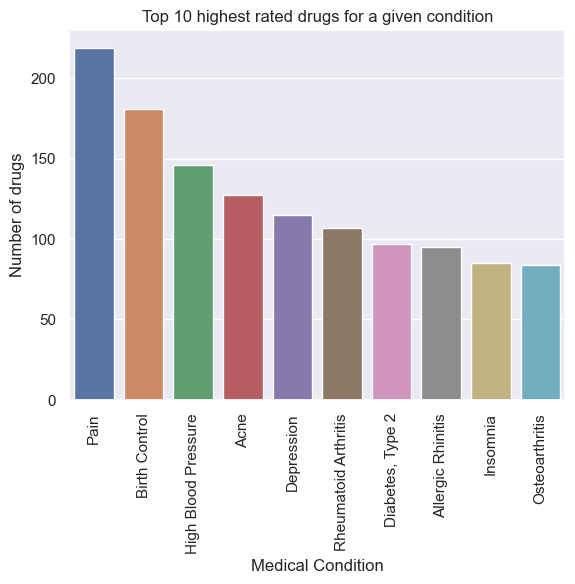

In [28]:
top_10_drugs_per_condition = data.groupby('condition')['drugName'].nunique().sort_values(ascending = False).head(10)
sns.barplot(x = top_10_drugs_per_condition.index, 
            y = top_10_drugs_per_condition.values)
plt.xticks(rotation = 90)
plt.title('Top 10 highest rated drugs for a given condition')
plt.ylabel('Number of drugs')
plt.xlabel('Medical Condition')
plt.show()

We see that there are over 200 drugs just for Pain relief and over 150 drugs for Birth Control. High Blood Pressure, Acne and Depression complete the top 5.

So what are the top drugs used for pain relief?

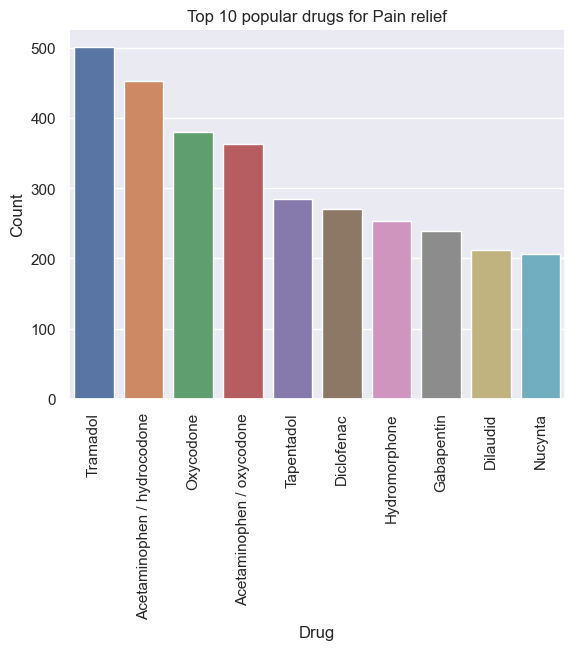

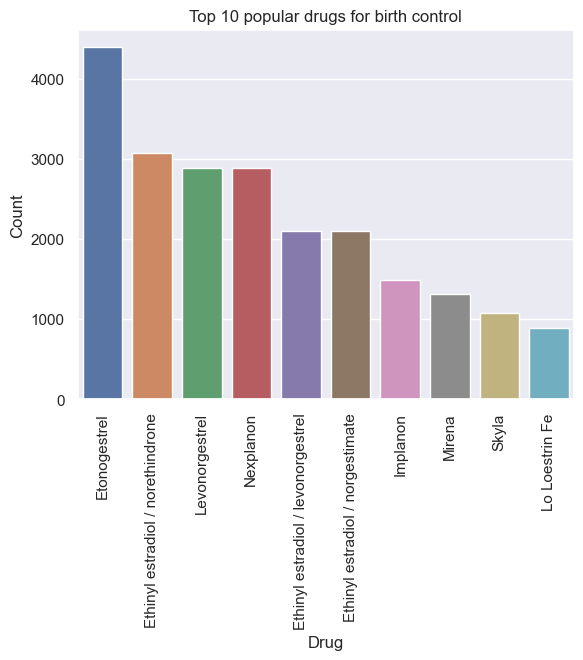

In [29]:
top_pain_drugs = data[data['condition'] == 'Pain']['drugName'].value_counts().head(10)
top_birthcontrol_drugs = data[data['condition'] == 'Birth Control']['drugName'].value_counts().head(10)
plt.figure()
sns.barplot(x = top_pain_drugs.index, 
            y = top_pain_drugs.values)
plt.xticks(rotation = 90)
plt.title('Top 10 popular drugs for Pain relief')
plt.ylabel('Count')
plt.xlabel('Drug')
plt.show()
plt.figure()
sns.barplot(x = top_birthcontrol_drugs.index, 
            y = top_birthcontrol_drugs.values)
plt.xticks(rotation = 90)
plt.title('Top 10 popular drugs for birth control')
plt.ylabel('Count')
plt.xlabel('Drug')
plt.show()

We see that the top two drugs for Pain Relief are Tramadol and Acetaminophen, while the top drug for Birth Control is Etonogestrel. There is a large difference between the number of users who have used Etonogestrel and Norethindrone.

Note that these drugs are widely used for the given medical condition but may not be the highest rated by the users. We can factor in the rating as well to get the highest rated drug used for the aforementioned medical conditions:

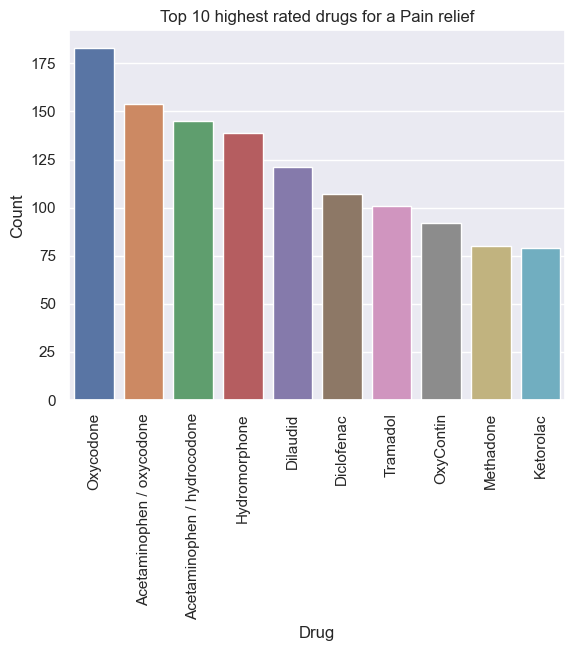

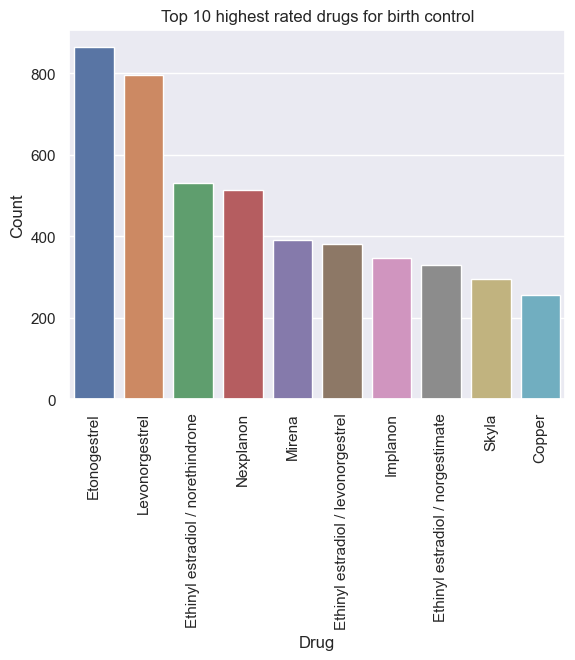

In [30]:
top_pain_drugs = data[(data['condition'] == 'Pain') & (data['rating'] == 10)]['drugName'].value_counts().head(10)
top_birthcontrol_drugs = data[(data['condition'] == 'Birth Control') & (data['rating'] == 10)]['drugName'].value_counts().head(10)
plt.figure()
sns.barplot(x = top_pain_drugs.index, 
            y = top_pain_drugs.values)
plt.xticks(rotation = 90)
plt.title('Top 10 highest rated drugs for a Pain relief')
plt.ylabel('Count')
plt.xlabel('Drug')
plt.show()
plt.figure()
sns.barplot(x = top_birthcontrol_drugs.index, 
            y = top_birthcontrol_drugs.values)
plt.xticks(rotation = 90)
plt.title('Top 10 highest rated drugs for birth control')
plt.ylabel('Count')
plt.xlabel('Drug')
plt.show()

We now have a better picture:

- Tramadol and Oxycodone are widely used highest rated drugs for Pain Relief. We also see Hydromorphone in this list.
- Etonogestrel is still the widely used highest drug for Birth Control. It is closely followed by Levonorgestrel and Norethinodrone.

We can check the Period when maximum number of unique drugs were reviewed:

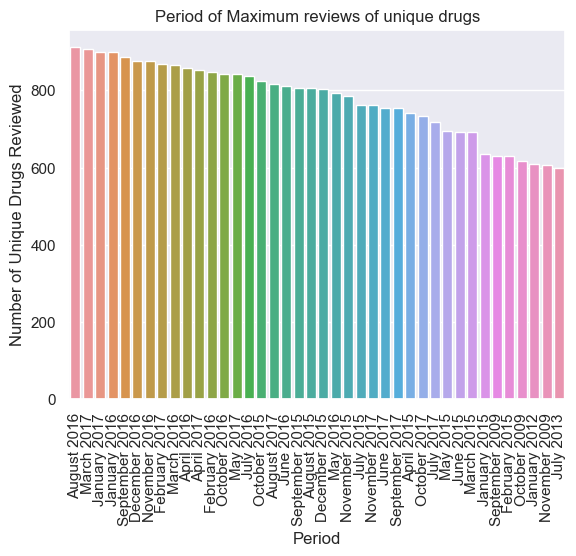

In [31]:
drug_per_period = data.groupby('Period')['drugName'].nunique().sort_values(ascending = False).head(40)
sns.barplot(x = drug_per_period.index, 
            y = drug_per_period.values)
plt.xticks(rotation = 90)
plt.title('Period of Maximum reviews of unique drugs')
plt.ylabel('Number of Unique Drugs Reviewed')
plt.xlabel('Period')
plt.show()

We find that a variety of drugs has been reviewed the most in the first and last three months of the years 2015, 2016 and 2017. Perhaps the drugs had passed clinical trials and became availale in the market or perhaps the researchers has found that they can be used to treat a wide variety of medical conditions that was previously not utilized.

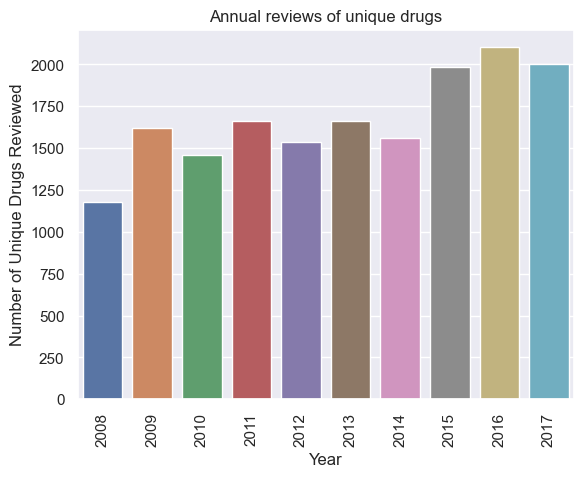

In [32]:
drug_per_year = data.groupby('Year')['drugName'].nunique()
sns.barplot(x = drug_per_year.index, 
            y = drug_per_year.values)
plt.xticks(rotation = 90)
plt.title('Annual reviews of unique drugs')
plt.ylabel('Number of Unique Drugs Reviewed')
plt.xlabel('Year')
plt.show()

The annual chart of the maximum number of unique drugs gives the concrete answer: We find that the number of unique drugs are the highest in the three years of 2015, 2016 and 2017. 

**Was there an increase in the conditions during this period too?**

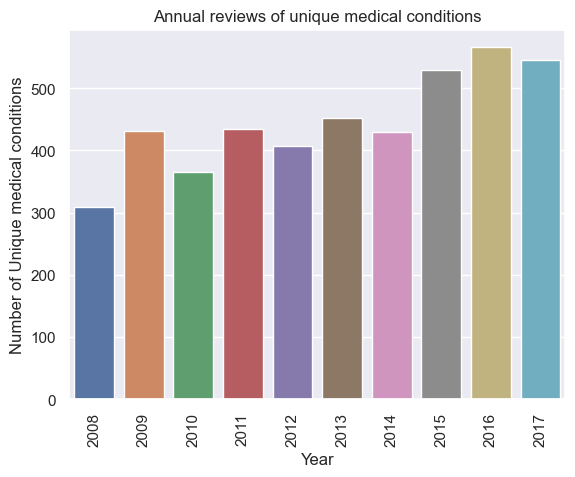

In [33]:
condition_per_year = data.groupby('Year')['condition'].nunique()
sns.barplot(x = condition_per_year.index, 
            y = condition_per_year.values)
plt.xticks(rotation = 90)
plt.title('Annual reviews of unique medical conditions')
plt.ylabel('Number of Unique medical conditions')
plt.xlabel('Year')
plt.show()

There was indeed a rise in the number of unique medical conditions during the years 2015, 2016 and 2017. What were the top medical conditions in these years?

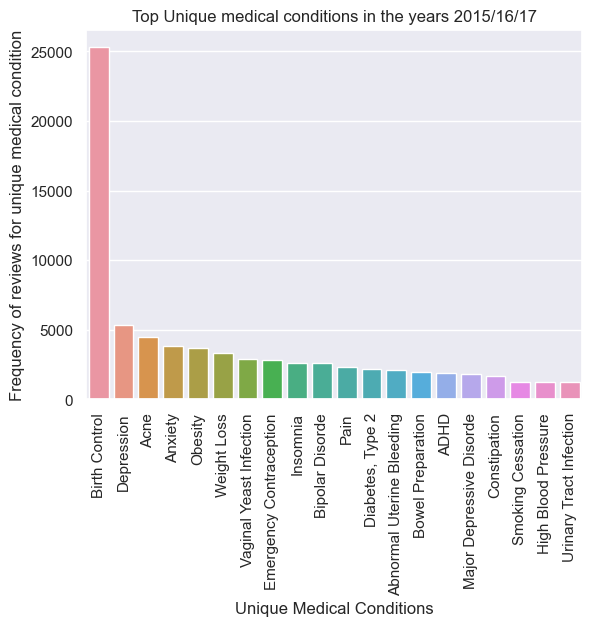

In [34]:
three_year_conditions = data[(data['Year'] == 2015) | (data['Year'] == 2016) | (data['Year'] == 2017)]['condition'].value_counts().head(20)
sns.barplot(x = three_year_conditions.index, 
            y = three_year_conditions.values)
plt.xticks(rotation = 90)
plt.title('Top Unique medical conditions in the years 2015/16/17')
plt.ylabel('Frequency of reviews for unique medical condition')
plt.xlabel('Unique Medical Conditions')
plt.show()

The most frequently reviewed medical condition in the collective years of 2015/16/17 is Birth Control. The gap between the reviews of Birth Control and Depression is huge, with a difference of about 20,000 in frequency.

If we were to look at the highest rated reviews of the unique conditions in the aforementioned years, could we expect to see Birth Control the top 3?

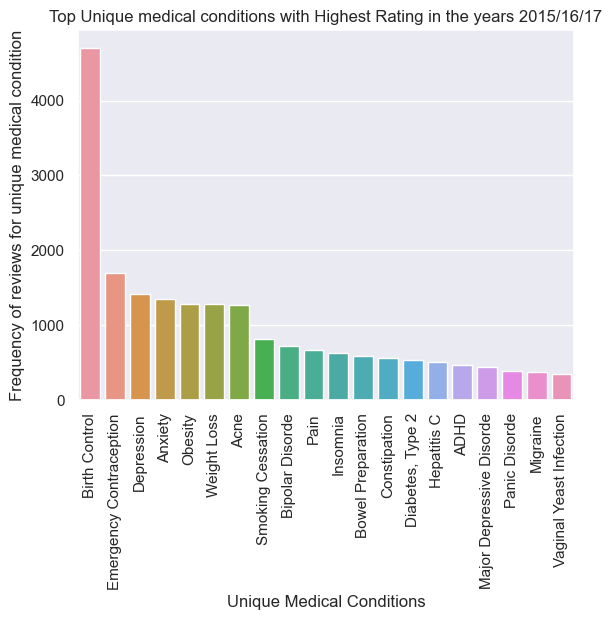

In [35]:
three_year_conditions = data[(data['rating'] == 10) & ((data['Year'] == 2015) | (data['Year'] == 2016) | (data['Year'] == 2017))]['condition'].value_counts().head(20)
sns.barplot(x = three_year_conditions.index, 
            y = three_year_conditions.values)
plt.xticks(rotation = 90)
plt.title('Top Unique medical conditions with Highest Rating in the years 2015/16/17')
plt.ylabel('Frequency of reviews for unique medical condition')
plt.xlabel('Unique Medical Conditions')
plt.show()

Birth Control and Emergency Contraception are the two highest-rated top unique medical conditions that were the most frequently reviewed in the years 2015/16/17.

After extensive research, it was found that issues ranging from disease outbreak to political developments influence the medical drug market in some way. To understand the high popularity of reviews revolving Birth Control and Emergency Contraception, a preliminary search was conducted around the events that occurred in the US between 2015 and 2017, particularly in the year 2016 - Since the source of the data is US-based. It has come to attention that perhaps even the [Presidential Election in 2016 may have actually infuenced the users' view and subsequent decision on Birth Control](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5607639/).

We now check the number of reviews on an annual and monthly basis:

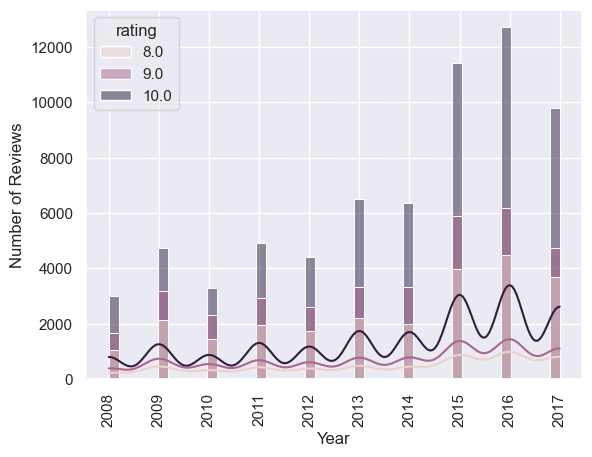

In [36]:
rating_above_7 = data[data['rating'] >= 8]
ax = sns.histplot(x = data['Year'], kde = True, hue = rating_above_7['rating'])
ax.set(ylabel = 'Number of Reviews')
ax.set_xticks(range(2008, 2018))
plt.xticks(rotation = 90)
plt.show()

The years 2015 to 2017 account for the highest number of reviews. The ratings of the reviews are also the significantly high in these three years, with 2016 recording most of the highest rated reviews.

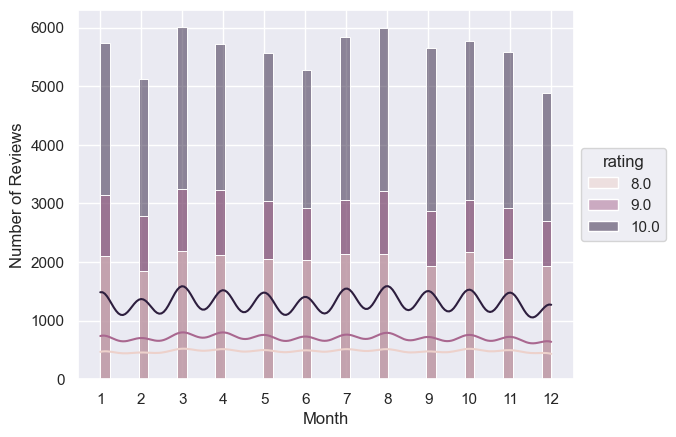

In [37]:
rating_above_7 = data[data['rating'] >= 8]
ax = sns.histplot(x = data['Month'], kde = True, hue = rating_above_7['rating'])
ax.set(ylabel = 'Number of Reviews')
ax.set_xticks(range(1, 13))
sns.move_legend(ax, bbox_to_anchor = (1, 0.5), loc = 'center left')
plt.show()

We can see that most of the highest-rated reviews are either in March or August of a given year. However, we find that the number of reviews does not vary significantly between the months of the year in general.

We now check the mean ratings on a monthly and yearly basis:

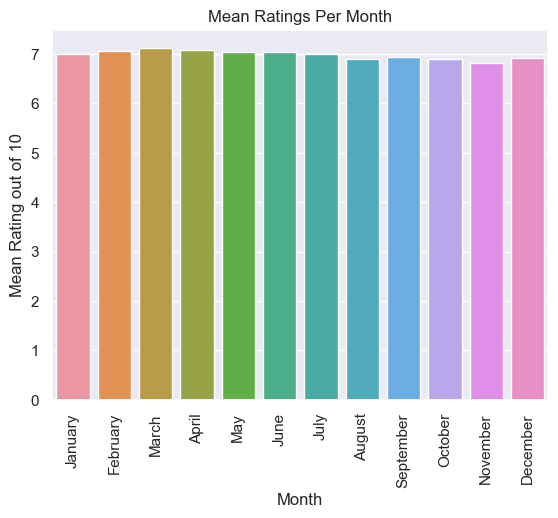

In [38]:
mean_monthly_rating = data.groupby('Month')['rating'].mean()
ax = sns.barplot(x = mean_monthly_rating.index, 
                 y = mean_monthly_rating.values)
plt.xticks(rotation = 90)
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November',
                    'December'])
plt.title('Mean Ratings Per Month')
plt.ylabel('Mean Rating out of 10')
plt.xlabel('Month')
plt.show()

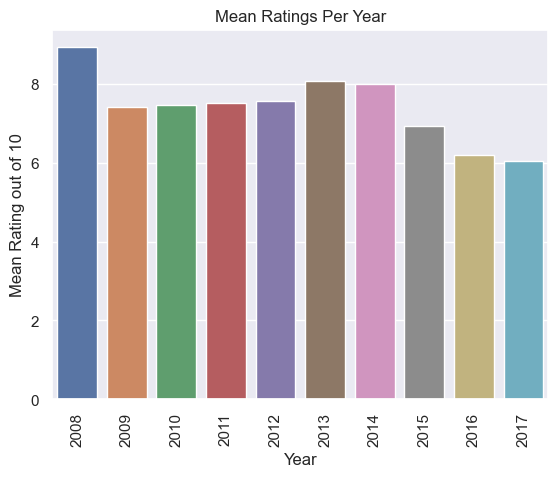

In [39]:
mean_yearly_rating = data.groupby('Year')['rating'].mean()
sns.barplot(x = mean_yearly_rating.index, y = mean_yearly_rating.values)
plt.xticks(rotation = 90)
plt.title('Mean Ratings Per Year')
plt.ylabel('Mean Rating out of 10')
plt.xlabel('Year')
plt.show()

Our Observations:
- The mean ratings per month seem to revolve around a constant value of 7. 
- Annually, the mean rating is the highest in the year 2008 at about 9. The rating has more or less remained constant between 2009 and 2014 but has continued to decline since then.

When we look at ratings, it would also be better to know what percentage each rating consists of in the entirety of the dataset:

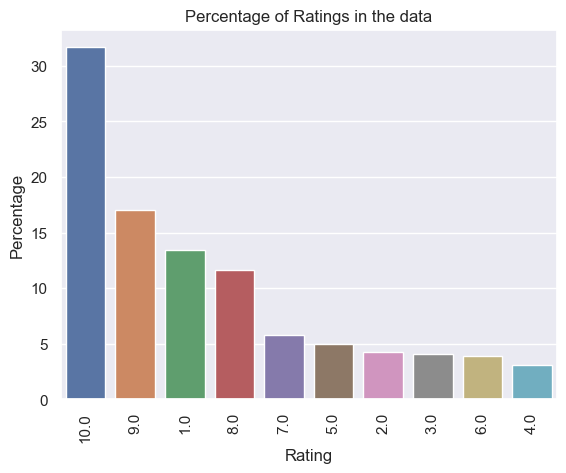

In [40]:
count_rating = data['rating'].value_counts()
percentage_rating = 100 * count_rating/len(data)
ratings_df = pd.DataFrame({'rating': percentage_rating.index, 'count': count_rating.values,
                           'percentage': percentage_rating.values})

sns.barplot(x = ratings_df['rating'], y = ratings_df['percentage'], 
           order = ratings_df['rating'])
plt.xticks(rotation = 90)
plt.title('Percentage of Ratings in the data')
plt.ylabel('Percentage')
plt.xlabel('Rating')
plt.show()

- We find that most of the ratings in the data are on the higher end, with 10 and 9 the top 2 ratings in the dataset, making up a cumulative percentage close to 50%. Among the top 5 rating with highest percentages is the rating 8 as well.
- It is also interesting to notice that about 13% of the ratings are on the lowest spectrum of the data with a rating of 1. 
- Approximately 70% of the reviews have a rating above 7.

The above two observations imply that most of the users rate and/or review the drugs either *when it has helped them cure/treat the medical condition significantly (rating 8 or above)* or *it has not helped them at all, actually worsened their medical condition or perhaps the drug simply failed - all corresponding to a rating of 1.*

We finally move onto analyzing the usefulCount column, which provides details about how many users found a particular review useful.

While describing the data, we found that the maximum value was significantly higher than the mean and the standard deviation was significantly large, meaning that the data is vastly distributed and there are outliers. We can check this using the boxplot:

<AxesSubplot:ylabel='usefulCount'>

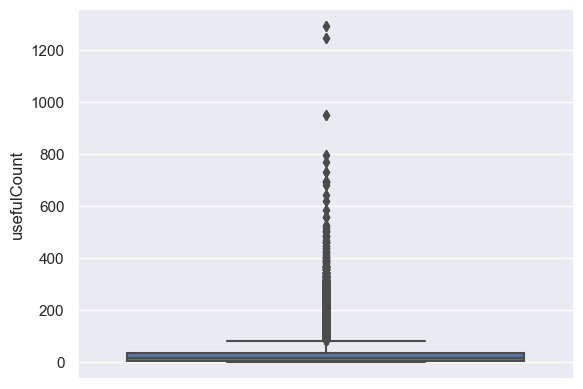

In [41]:
sns.boxplot(y = data['usefulCount'])

<AxesSubplot:ylabel='usefulCount'>

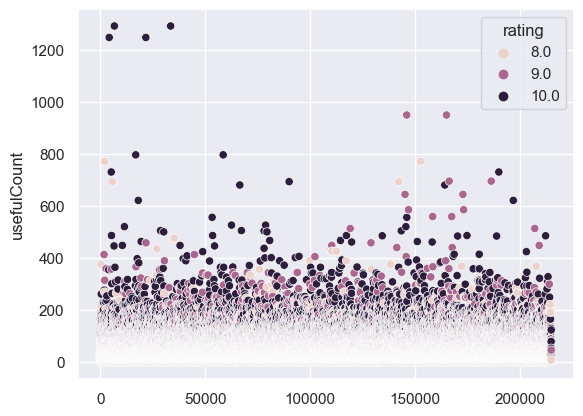

In [42]:
sns.scatterplot(x = data.index, y = data['usefulCount'], hue = rating_above_7['rating'])

We can check the review that the maximum number of people found useful (we have previously read this briefly when we checked if our review was indeed scrapped clean):

In [43]:
highest_usefulCount = data.loc[data['usefulCount'] == 1291][['condition', 'drugName', 'reviewScrapped', 'rating']]
highest_usefulCount

,condition,drugName,reviewScrapped,rating
6716,Depression,Sertraline,remember reading people opinion online drug to...,10.0
33552,Depression,Zoloft,remember reading people opinion online drug to...,10.0


It seems like the drug is different, but the condition and the review is the same. Let's confirm if this indeed is the case (using either *value_counts() or unique() or even nunique()*): 

In [44]:
highest_usefulCount['reviewScrapped'].value_counts()

remember reading people opinion online drug took scared away finally decided give try best choice made month feel great mg side effect first started notice hand would tremble subsided honestly listen negativity work work amazing others go based youself everyone else may blessing diguise pill meant make happy go lucky see butterfly rose meant help put chemical mind balance overly depressed still get sad time normal life people take control make change getting pill    2
Name: reviewScrapped, dtype: int64

So the review itself is the same; only the drug has been tagged differently. 

This means: 
- EITHER the user has tagged the drug incorrectly, did not bother to delete the previous review after it has been corrected 
- OR the user had perhaps tried both the drugs and both has worked well for the patient in question and thus copy-pasted the review. 

Whatever the case may be, this analysis has given an interesting observation that we have already explored: *Multiple drugs can be used to treat a particular medical condition.* This is an increasingly common practice in the healthcare industry.

From the Pandas Profiling, we understood that there are approximately 8400 reviews (before review cleaning) that are deemeed useless by users (usefulCount = 0). We check if the reviews are indeed useless.

Note: For the purposes of reading through the reviews, we choose the raw review.

In [45]:
deemed_useless_reviews = data.loc[data['usefulCount'] == 0].sort_values(by = 'rating', ascending = False)[['condition', 'drugName', 'review', 'rating']]
deemed_useless_reviews.head(10)

,condition,drugName,review,rating
214906,Lyme Disease,Cefuroxime,"""Ceftin is the only antibiotic that cured my L...",10.0
35042,Birth Control,Depo-Provera,"""I have been on the Depo for 10 years!!! And i...",10.0
119394,Non-Small Cell Lung Cance,Crizotinib,"""I was diagnosed with stage 3 lung cancer. My ...",10.0
119610,Birth Control,Ethinyl estradiol / norgestimate,"""Let me start off by saying, yes, the bad revi...",10.0
119793,Non-Small Cell Lung Cance,Necitumumab,"""Been on Necitumumab 3 years and last CT scan...",10.0
119889,Emergency Contraception,Aftera,"""Had unprotected sex on the 31 of Dec 16 . Too...",10.0
35278,Chronic Pain,Subutex,"""Have had Fibromyalgia for 16 yrs. I started w...",10.0
120031,"Diabetes, Type 2",Exenatide,"""Recently started on Byetta, 57yr old male. We...",10.0
35250,Vitamin/Mineral Supplementation during Pregnan...,"Multivitamin, prenatal","""These have been my favorite due to the size a...",10.0
35143,Hepatitis C,Sofosbuvir / velpatasvir,"""I was a 17 years hep C type 1 sufferer, unsu...",10.0


In [46]:
deemed_useless_reviews.shape

(7999, 4)

So there are about 8000 reviews that are not useful to any of the users. However, the reviews have high ratings. Let's check the top 5 reviews:

In [47]:
print(deemed_useless_reviews['review'].head().unique())

['"Ceftin is the only antibiotic that cured my Lyme Disease after trying others.   I have been symptom free for many years now.  I took it for 6 weeks."'
 '"I have been on the Depo for 10 years!!! And it has been wonderful!! I don&#039;t have mood swings, I don&#039;t have depression. I feel a little blue on the day of the shot but that&#039;s about it. I did experience weight gain at first, I was 128 lbs starting on it then ballooned to 165 in the first 3 years, and now hover at 153 lbs (without real exercise but watching what I eat), I&#039;m 5&#039;6&quot;. The only reason I&#039;m getting off of it is because my current obgyn, who I switched to after 5 years of being on depo because my last obgyn retired, freaked out that I had been on it so long and wants to give my body a 1 year break due to the bone density loss issue. No acne, and my periods stopped after 6 months."'
 '"I was diagnosed with stage 3 lung cancer. My doctors all agreed I would need chemotherapy so I did 2 before m

The reviews seem legitimate; perhaps not as detailed as it may be for those reviews with high usefulCounts but nonetheless legitimate. 

Let us look at the reviews that have low rating and is deemed useless by the users:

In [48]:
deemed_useless_reviews.tail(10)

,condition,drugName,review,rating
11070,Narcolepsy,Armodafinil,"""I was just diagnosed with narcolepsy past wee...",1.0
17710,"Asthma, Maintenance",Budesonide / formoterol,"""After doing all possible tests there is no ot...",1.0
164588,Bowel Preparation,GaviLyte-N,"""I experienced a 6 pound weight in two days of...",1.0
100358,Vaginal Yeast Infection,Miconazole,"""Tried one application and immediately I had p...",1.0
130454,Prostatitis,Levofloxacin,"""I prescribe 750 mg of Levofloxacin for acute ...",1.0
183890,Anxiety,Paroxetine,"""This drug near killed me .. Why ? couldn&#039...",1.0
130501,"Herpes Simplex, Suppression",Valacyclovir,"""It&#039;s my 3rd day now on this and yet no s...",1.0
74916,Urinary Tract Infection,Amoxicillin / clavulanate,"""I took amox/clav for three days, then spent t...",1.0
130523,Birth Control,Ethinyl estradiol / norethindrone,"""I have used Loestrin Fe and Gildess Fe in the...",1.0
153165,Birth Control,Blisovi Fe 1 / 20,"""I am on my 6th week. My pharmacy changed me ...",1.0


In [49]:
print(deemed_useless_reviews['review'].tail().unique())

['"This drug near killed me .. Why ? couldn&#039;t  sleep even an hour, had panic attack ..  Paroxetine it&#039;s worst nightmare ,.,.  Dire Side effects"'
 '"It&#039;s my 3rd day now on this and yet no sign of relief. I&#039;m starting to get worried, the swelling and burning when I pee is still there and it&#039;s almost unbearable but hopefully it gets better."'
 '"I took amox/clav for three days, then spent the next ten days with a rash over every single inch of my body that itched 24 hours a day.  Got rid of the UTI, but I couldn&#039;t leave the house for over a week - couldn&#039;t stand clothes on my skin.  The only thing that helped was scalding water, so I showered several times a day when the Benadryl would wear off.  NEVER AGAIN!!!!!"'
 '"I have used Loestrin Fe and Gildess Fe in the past and never had an issue with either. I was on Gildess up until a couple months ago, when my pharmacy switched me to Microgestin Fe 1/20 and told me that it was exactly the same as Gildess.\

We can say the same for these reviews as well. 

Thus, we arrive at an important observation: **A review can still be legitimate, can have legitimate ratings and still may not be of any use for the users.** There is also a possible scenario that the users may have skipped reading these reviews entirely, for whatever reason it may be. Therefore, *we cannot rely on usefulCount to effectively tell us if a review is actually useful or not.* 

On the other hand, this is a scenario where we can understand the Sentiment of the users - perhaps, we can expect these reviews to be more subjective and less objectual or factual in nature.

In [50]:
from textblob import TextBlob
deemed_useless_reviews['Polarity'] = deemed_useless_reviews['review'].apply(lambda review: TextBlob(review).sentiment.polarity)
deemed_useless_reviews['Subjectivity'] = deemed_useless_reviews['review'].apply(lambda review: TextBlob(review).sentiment.subjectivity)
deemed_useless_reviews.head()

,condition,drugName,review,rating,Polarity,Subjectivity
214906,Lyme Disease,Cefuroxime,"""Ceftin is the only antibiotic that cured my L...",10.0,0.300000,0.766667
35042,Birth Control,Depo-Provera,"""I have been on the Depo for 10 years!!! And i...",10.0,0.118269,0.385256
119394,Non-Small Cell Lung Cance,Crizotinib,"""I was diagnosed with stage 3 lung cancer. My ...",10.0,0.440000,0.440000
119610,Birth Control,Ethinyl estradiol / norgestimate,"""Let me start off by saying, yes, the bad revi...",10.0,0.127027,0.476150
119793,Non-Small Cell Lung Cance,Necitumumab,"""Been on Necitumumab 3 years and last CT scan...",10.0,-0.013333,0.508889


Let's now take the first review and see how they compare in terms of Polarity and Subjectivity:

In [51]:
print(deemed_useless_reviews['review'].head(1).unique())

['"Ceftin is the only antibiotic that cured my Lyme Disease after trying others.   I have been symptom free for many years now.  I took it for 6 weeks."']


For the above review, the polarity is is 0.3 (see dataframe above), which corresponds to a positive sentiment and the sentiment is 0.77 which translates to the review being more opinionated and less objective in nature. This makes sense because the review, although being positive, also has personal experience at its core. This is expected in review, since user experiences differ.

It will be interesting to see if there are any reviews with subjectivity 0.

#### Limitation of TextBlob's Sentiment

In [52]:
deemed_useless_reviews[deemed_useless_reviews['Subjectivity'] == 0][['review', 'Polarity', 'rating']].head(3)

,review,Polarity,rating
120190,"""No seizures no side effects""",0.025,10.0
121624,"""I&#039;ve been using Humalog for 15 years or ...",0.000,10.0
35882,"""No side effects after 2 weeks, and i have bee...",0.000,10.0


The first review is a positive review by nature, has high rating and is neutral. Let's explore the second and third review:

In [53]:
print(deemed_useless_reviews[deemed_useless_reviews['Subjectivity'] == 0]['review'].head(3)[1:].unique())

['"I&#039;ve been using Humalog for 15 years or so. I&#039;ve never had a problem with it. I use an insulin pump and it works well with my basal dose."'
 '"No side effects after 2 weeks, and i have been taking I a day."']


The second review is positive and thus, should have had a high polarity. However, the Polarity and the subjectivity is zero. This depicts the problem with TextBlob's Sentiment: Polarity depends on the adjective of the text in question, while the subjectivity depends on the intensity of the word. The case is similar for the third review.

How about the sentiment of the reviews with the lowest rating?

In [54]:
deemed_useless_reviews[deemed_useless_reviews['Subjectivity'] == 0][['condition', 'review', 'Polarity', 'rating']].tail(3)

,condition,review,Polarity,rating
184143,Birth Control,"""It came out""",0.0,1.0
130684,Dietary Supplementation,"""I had severe stomach cramps and diarrhea whil...",0.0,1.0
100404,Urinary Incontinence,"""pill passed in stool 24hours later""",0.0,1.0


The first and the third review is actually a negative review in the context of the condition it is refering to and thus, the polarity should have been negative, indicating a negative sentiment. However, due to the nature that the Polarity is calculated, the statement is deemed neutral. We could probably say the same for the second review.

We conclude our analysis here. Let us check the data again:

In [55]:
data.head()

,drugName,condition,review,rating,usefulCount,Period,Year,Month,reviewScrapped
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,27,May 2012,2012,5,side effect take combination bystolic mg fish oil
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,192,April 2010,2010,4,son halfway fourth week intuniv became concern...
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,17,December 2009,2009,12,used take another oral contraceptive pill cycl...
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,10,November 2015,2015,11,first time using form birth control glad went ...
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,37,November 2016,2016,11,suboxone completely turned life around feel he...


We drop the columns that contain information about the date of review:

In [56]:
data.drop(['Period', 'Year', 'Month'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212106 entries, 0 to 215062
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   drugName        212106 non-null  object 
 1   condition       212106 non-null  object 
 2   review          212106 non-null  object 
 3   rating          212106 non-null  float64
 4   usefulCount     212106 non-null  int64  
 5   reviewScrapped  212106 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.3+ MB


Save the data as CSV:

In [57]:
data.to_csv(r'./preprocessed_data.csv', index = False)